**CASO PRACTICO 1 -**
**Machine Learning - Decision Tree**

"Desicion Tree" es un modelo de predicción que genera un "mapa" o "flujo" de decisiones secuenciales basada en el uso de resultados y probabilidades.


En este caso de uso intentaremos predecir si una mujer posee diabetes partiendo de una serie de características asociadas.

Para el entrenamiento del modelo vamos a usar el siguiente dataset publico: https://data.world/akshayginodia/diabetes-dataset . Este corresponde a un muestreo de mujeres en edad fértil que padecen o no, diabetes.

In [ ]:
# Cargamos librerias a utilizar.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from matplotlib.pyplot import figure
from google.colab import files
uploaded = files.upload()

# Aquí vas a cargar el dataset.

Saving diabetes.csv to diabetes (1).csv


Realizamos un análisis exploratorio de los datos obtenidos, para su posterior limpieza y preparación previa a la explotación.

In [ ]:
# Primera vista del dataset.
# Leemos el csv. Yo le cambie el nombre por "diabetes.csv".
df = pd.read_csv("diabetes.csv")
df.head(100)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,8,183,64,0,0,23.3,0.672,32,1
2,0,137,40,35,168,43.1,2.288,33,1
3,5,116,74,0,0,25.6,0.201,30,0
4,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
95,4,76,62,0,0,34.0,0.391,25,0
96,4,146,92,0,0,31.2,0.539,61,1
97,5,78,48,0,0,33.7,0.654,25,0
98,4,97,60,23,0,28.2,0.443,22,0


In [ ]:
# Análisis de posibles valores y su frecuencia de aparición
df.describe()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.894137,121.985342,68.768730,20.698697,82.047231,31.742508,0.484182,33.441368,0.348534
std,3.421484,32.326810,19.757137,15.784502,117.910600,8.058937,0.344738,11.894135,0.476895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.125000,0.249500,24.000000,0.000000
50%,3.000000,117.500000,72.000000,23.000000,36.500000,31.900000,0.382500,29.000000,0.000000
75%,6.000000,143.750000,80.000000,32.000000,128.750000,36.275000,0.639250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [ ]:
# Considero que tanto mass, como insulin o glucosa no puede ser 0, con lo cual los filtro como "outliers" o valores erróneos.
df_filter = df.query('mass != 0')
df_filter = df_filter.query('insulin != 0')
df_filter = df_filter.query('glucose != 0')

# Adapto columna de diabetes.
df_filter.loc[df['diabetes'] == 1 , 'diabetes'] = 'SI' 
df_filter.loc[df['diabetes'] == 0 , 'diabetes'] = 'NO' 

# Verifico el número de filas finales obtenidas.
df_filter.shape

(315, 9)

Una vez preparados los datos podemos notar como casi la mitad del dataset termina filtrado debido a que no cumple con los requerimientos especificados. 

Previo al entrenamiento del "Desicion Tree”, estudiaremos las variables para conocer cuál es su incidencia en el diagnóstico y las posibles correlaciones que existen entre ellas.
Este paso es importante porque nos permitirá seleccionar los parámetros adecuados para el entrenamiento del modelo.


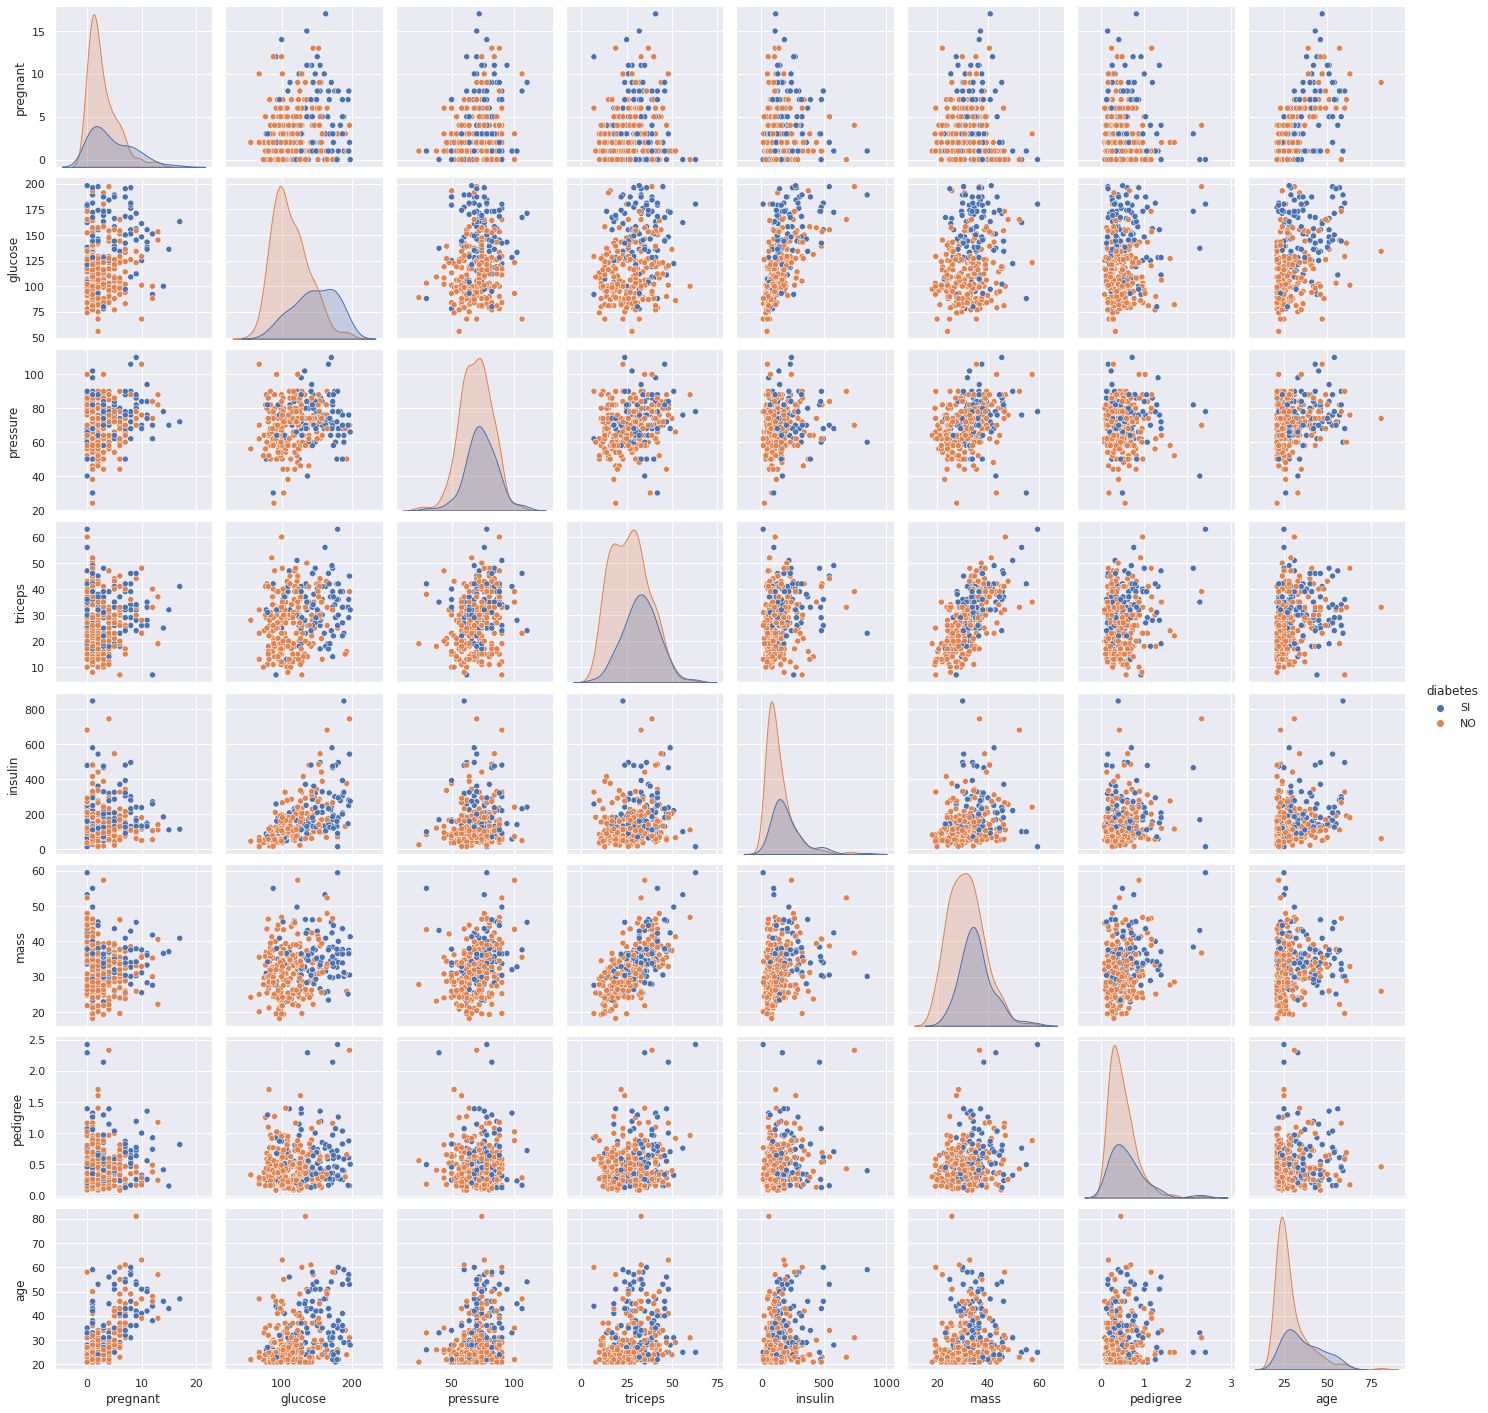

In [ ]:
# Genero un pairplot de las variables para conocer qué tipos de relaciones existen entre las características y la diabetes.
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(df_filter, hue='diabetes');

De la matriz de relación obtengo los siguientes insights:

1. Glucose es la característica que mejor se relaciona con la diabetes.
2. Existen otras 4 relaciones débiles que considerar para el modelo; age, mass, insulin y pregnant.
3. Existe una correlación lineal entre triceps y mass, con lo cual, puedo pasar por alto una de ellas sin perder información significativa.
4. La variable pedigree posee una incidencia muy baja. Vemos que se encuentran alineados los puntos máximos y poseen la misma distribución.




In [ ]:
# Filtro los campos requeridos.
df_filter_selected = df_filter[['pregnant','glucose','insulin','mass','age','diabetes']]

In [ ]:
# Asigno los parámetros para el entrenamiento del modelo.
features = ['pregnant','glucose','insulin','mass','age']

# Selecciono una parte del dataset para entrenar el modelo.
X = df_filter_selected[['pregnant','glucose','insulin','mass','age']].loc[0:500]
y = df_filter_selected['diabetes'].loc[0:500]

In [ ]:
# Entreno el modelo.
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)

Una vez entrenado el modelo, realizo una prueba con el sobrante del dataset para evaluar la eficacia del modelo.

In [ ]:
# Declaro los contadores.
count_bien = 0
count_total= 0

# Tomo el dataset restante.
df_test = df_filter_selected[['pregnant','glucose','insulin','mass','age','diabetes']].loc[501:]

In [ ]:
# Recorro el dataset sobrante, y comparo el resultado del modelo con el real.
for index, row in df_test.iterrows():
    count_total = count_total + 1
    resultado=dtree.predict([[row['pregnant'],row['glucose'],row['insulin'], row['mass'], row['age']]])
    if ( row['diabetes'] == resultado):
      count_bien = count_bien + 1
    else:
      count_mal = count_mal + 1

In [ ]:
# Obtengo la efectividad del modelo.
count_bien / count_total

0.7931034482758621

**Conclusión**

Nuestro modelo nos permite predecir con un 79% (aprox) de eficacia si una mujer en edad fertil posee diabetes en base a las siguientes caracteristicas: pregnant, glucose, insulin, mass y age.

Vimos que resulta sumamente sencillo el proceso de aplicacion del modelo. La verdadera complejidad radica en la informacion que le introducimos.

El dataset, es limitado en cantidad de informacion ofrecida. Tanto en el numero de caracteristicas como en la cantidad de filas. Un dataset mas rico en informacion nos permitiria validar que el modelo funciona correctamente, y también, mejorar la eficacia del mismo.


¿Quieres conocer más? Conoce la bibliografía utilizada:

* https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html
* https://www.w3schools.com/python/python_ml_decision_tree.asp
* https://jakevdp.github.io/PythonDataScienceHandbook/index.html
